# Exploratory Data Analysis
## Gym exercises
**Author:** Virginia Herrero

### Introduction

This data analysis project focuses on exploring data from a CSV dataset using Python.

The goal of this work is to explore and analyze the dataset to obtain valuable information about gym workouts. The analysis process covers key steps such as data loading, data cleaning, data exploration, data analysis, and data visualization using Python.

### Goal

The ultimate goal of this project is to explore the CSV file dataset to obtain all relevant information about a large collection of gym exercises.

Once the data is loaded, it will be cleaned and preprocessed to undergo univariate and bivariate exploration, to then display and visualize the significant results obtained.

Through the exploration and analysis of the data, it is expected to answer the following questions:

- Most trained muscle groups
- Most frequently used equipment
- Most performed type of exercise
- Most frequent type of user: beginner, intermediate, or expert
- Most used muscle group

### Data Loading

In [1]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gym_exercises_df = pd.read_csv("../data/raw/Gym-exercises-dataset.csv")

### Data Cleaning

- **Getting to know the data set**

In [3]:
gym_exercises_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2886 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


In [4]:
gym_exercises_df.head()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [5]:
gym_exercises_df.tail()

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2917,2917,30 Arms EZ-Bar Skullcrusher,NaN,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


- **Drop unnecessary columns for this analysis**

In [6]:
gym_exercises_df.columns

Index(['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc'],
      dtype='object')

In [7]:
gym_exercises_df = gym_exercises_df.drop(columns = ["Unnamed: 0", "Desc", "RatingDesc"])
gym_exercises_df

,Title,Type,BodyPart,Equipment,Level,Rating
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,NaN
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,NaN
3,Banded crunch,Strength,Abdominals,Bands,Intermediate,NaN
4,Crunch,Strength,Abdominals,Bands,Intermediate,NaN
...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1
2914,Lying Close-Grip Barbell Triceps Press To Chin,Strength,Triceps,E-Z Curl Bar,Beginner,8.1
2915,EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN
2916,TBS Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN


- **Modify column names**

In [8]:
gym_exercises_df = gym_exercises_df.rename(columns = {"Title" : "Exercise Name", "Type" : "Exercise Type", "BodyPart" : "Muscle Group", "Level" : "Difficulty Level"})
gym_exercises_df

,Exercise Name,Exercise Type,Muscle Group,Equipment,Difficulty Level,Rating
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,NaN
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,NaN
3,Banded crunch,Strength,Abdominals,Bands,Intermediate,NaN
4,Crunch,Strength,Abdominals,Bands,Intermediate,NaN
...,...,...,...,...,...,...
2913,EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1
2914,Lying Close-Grip Barbell Triceps Press To Chin,Strength,Triceps,E-Z Curl Bar,Beginner,8.1
2915,EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN
2916,TBS Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN


- **Data types**

In [9]:
gym_exercises_df.dtypes

Exercise Name        object
Exercise Type        object
Muscle Group         object
Equipment            object
Difficulty Level     object
Rating              float64
dtype: object

- **Null values**

In [10]:
gym_exercises_df.isnull().sum()

Exercise Name          0
Exercise Type          0
Muscle Group           0
Equipment             32
Difficulty Level       0
Rating              1887
dtype: int64

Missing values from the column "Equipment" are dropped since they represent a small percentage of the dataset.

In [11]:
gym_exercises_df = gym_exercises_df.dropna(subset = "Equipment")

The rating series has a high percentage of missing values, which could be due to web scraping problems. Since the data description specifies that the data was extracted from several websites, it is possible that the gym exercises were not rated in all of them.

The distribution of the rating data is skewed to the left, meaning that most of the values are centered on the left side of the tail of the distribution. In these cases, it is recommended to use median imputation values for the missing values. However, since the number of missing values is really high, it will change the distribution of the ratings, which will jeopardize the integrity and reliability of the data.

Dropping these values means deleting a large part of the data set, which could lead to incorrect analysis of the data. Dropping the whole series would be a good option in this case. Since this project does not involve any machine learning, there is no close relationship between the rest of the data and the rating series, and I would like to perform an analysis of the top-rated exercises, I decided to ignore the null values to ensure a larger, more complete and reliable dataset.

In [12]:
gym_exercises_df["Rating"].mean()

np.float64(5.949600798403194)

In [13]:
gym_exercises_df["Rating"].median()

np.float64(8.0)

[Text(0.5, 0, 'Rating data points'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Rating distribution')]

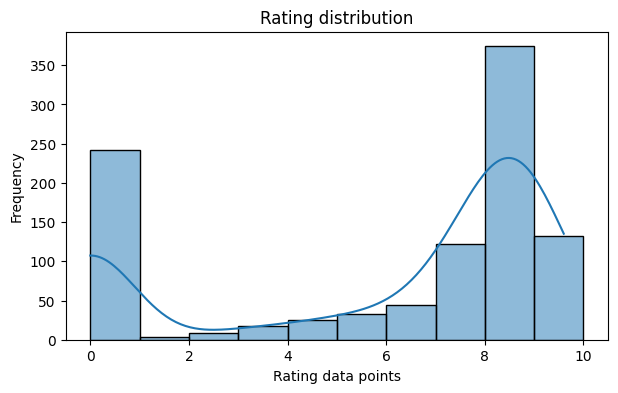

In [14]:
rating_distribution = plt.figure(figsize = (7, 4))
ax = sns.histplot(data = gym_exercises_df["Rating"], bins = 10, binrange = (0, 10), kde = True)
ax.set(xlabel = "Rating data points", ylabel = "Frequency", title = "Rating distribution")

- **Duplicates**

In [15]:
gym_exercises_df.duplicated().sum()

np.int64(9)

In [16]:
gym_exercises_df[gym_exercises_df.duplicated()]

,Exercise Name,Exercise Type,Muscle Group,Equipment,Difficulty Level,Rating
97,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5
645,Exercise Ball Cable Crunch - Gethin Variation,Strength,Abdominals,Cable,Intermediate,NaN
939,Band-suspended kettlebell bench press,Strength,Chest,Bands,Intermediate,NaN
958,Band-suspended kettlebell bench press,Strength,Chest,Bands,Intermediate,NaN
1709,Seated Cable Rows,Strength,Middle Back,Cable,Intermediate,8.8
1730,Seated Cable Rows,Strength,Middle Back,Cable,Intermediate,8.8
2004,Dumbbell step-up,Strength,Quadriceps,Dumbbell,Intermediate,8.2
2655,Arnold press,Strength,Shoulders,Dumbbell,Intermediate,8.9
2658,Seated rear delt fly,Strength,Shoulders,Dumbbell,Intermediate,8.4


In [17]:
gym_exercises_df = gym_exercises_df.drop_duplicates(keep = "first")

In [18]:
gym_exercises_df.reset_index(drop = True, inplace = True)

- **Outliers**

All series except the rating series are categorical, therefore there is no need of an outliers analysis.

* **Gym exercises clean dataset:**

In [19]:
gym_exercises_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Exercise Name     2877 non-null   object 
 1   Exercise Type     2877 non-null   object 
 2   Muscle Group      2877 non-null   object 
 3   Equipment         2877 non-null   object 
 4   Difficulty Level  2877 non-null   object 
 5   Rating            996 non-null    float64
dtypes: float64(1), object(5)
memory usage: 135.0+ KB


In [20]:
gym_exercises_df.head()

,Exercise Name,Exercise Type,Muscle Group,Equipment,Difficulty Level,Rating
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,NaN
2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,NaN
3,Banded crunch,Strength,Abdominals,Bands,Intermediate,NaN
4,Crunch,Strength,Abdominals,Bands,Intermediate,NaN


In [21]:
# Save the cleaned dataset
gym_exercises_df.to_csv("../data/processed/Gym-exercises-cleaned-dataset.csv")

### Data exploration

**Univariate exploration**

- **Number of exercises per muscle group**

From the muscle distribution it can be seen that the muscle groups with the most exercises are the abdominals and quadriceps. On the contrary, the muscle groups with the least exercises are the neck and the adductors.

In [22]:
amount_exercises_muscles = gym_exercises_df.groupby(["Muscle Group"]).count().sort_values(by = "Exercise Name", ascending = False)
amount_exercises_muscles

,Exercise Name,Exercise Type,Equipment,Difficulty Level,Rating
Muscle Group,,,,,
Abdominals,657,657,657,657,110
Quadriceps,639,639,639,639,212
Shoulders,335,335,335,335,136
Chest,260,260,260,260,113
Biceps,168,168,168,168,55
Triceps,151,151,151,151,66
Lats,121,121,121,121,42
Middle Back,116,116,116,116,42
Hamstrings,115,115,115,115,79


Text(0.5, 1.0, 'Exercise distribution per muscle group')

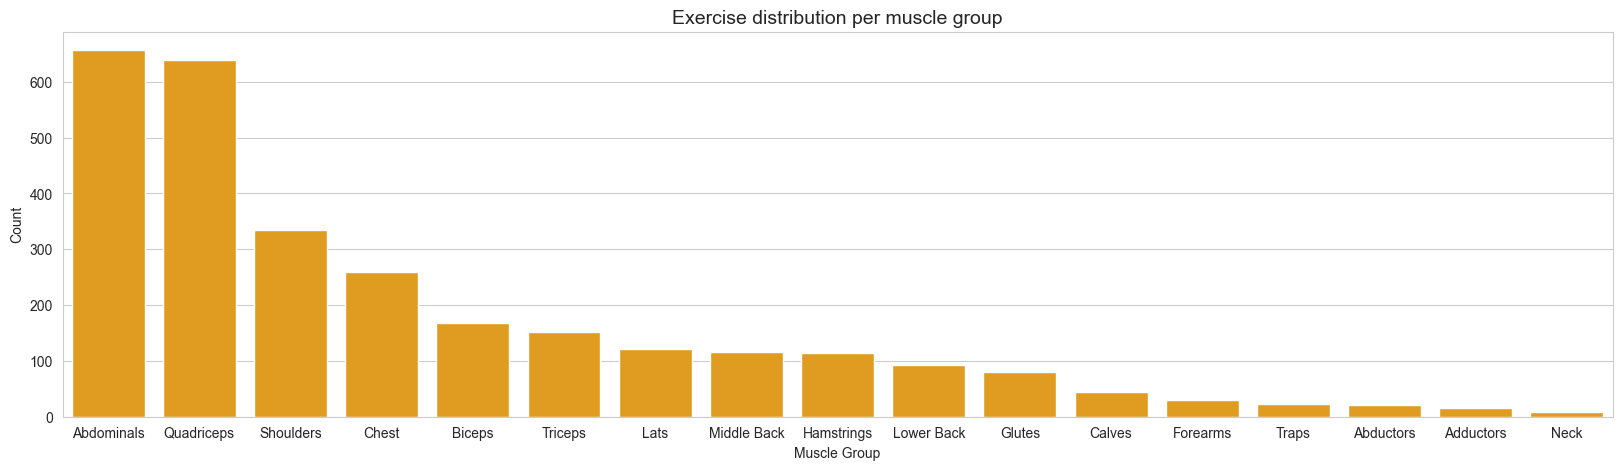

In [23]:
amount_exercises_muscles_graph = plt.figure(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(data = amount_exercises_muscles, x = "Muscle Group", y = "Exercise Name", color = "orange")
plt.xlabel("Muscle Group")
plt.ylabel("Count")
plt.title("Exercise distribution per muscle group", size = 14)

- **Number of exercise per difficulty level**

The largest number of exercises corresponds to the intermediate level of difficulty, followed by the beginner.

In [24]:
amount_exercises_difficulty = gym_exercises_df.groupby(["Difficulty Level"]).count().sort_values(by = "Exercise Name", ascending = False)
amount_exercises_difficulty

,Exercise Name,Exercise Type,Muscle Group,Equipment,Rating
Difficulty Level,,,,,
Intermediate,2430,2430,2430,2430,555
Beginner,434,434,434,434,434
Expert,13,13,13,13,7


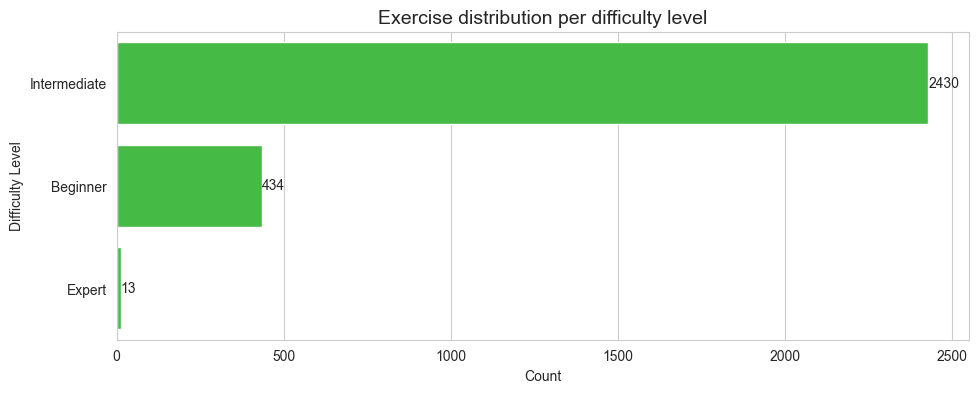

In [25]:
amount_exercises_difficulty_graph = plt.figure(figsize = (11, 4))
ax = sns.barplot(data = amount_exercises_difficulty, y = "Difficulty Level", x = "Exercise Name", color = "limegreen")
plt.ylabel("Difficulty Level")
plt.xlabel("Count")
plt.title("Exercise distribution per difficulty level", size = 14)
for i in ax.containers:
    ax.bar_label(i,)

- **Number of exercises per exercise type**

Strengthening exercises are the most frequent, followed by stretching exercises. On the other hand, strongman exercises are the least frequent, which makes sense because they are exercises for elite athletes who train to be the strongest.

In [26]:
amount_exercises_type = gym_exercises_df.groupby(["Exercise Type"]).count().sort_values(by = "Exercise Name", ascending = False)
amount_exercises_type

,Exercise Name,Muscle Group,Equipment,Difficulty Level,Rating
Exercise Type,,,,,
Strength,2529,2529,2529,2529,682
Stretching,125,125,125,125,102
Plyometrics,94,94,94,94,92
Powerlifting,37,37,37,37,36
Cardio,35,35,35,35,27
Olympic Weightlifting,35,35,35,35,35
Strongman,22,22,22,22,22


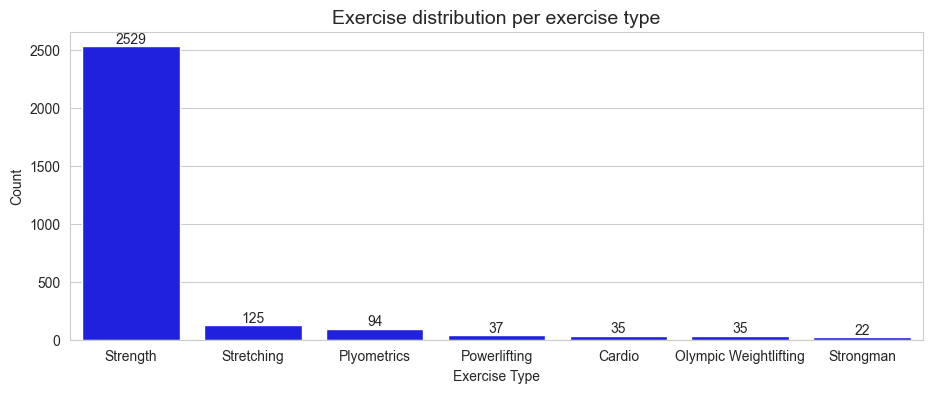

In [27]:
amount_exercises_type_graph = plt.figure(figsize = (11, 4))
ax = sns.barplot(data = amount_exercises_type, x = "Exercise Type", y = "Exercise Name", color = "blue")
plt.xlabel("Exercise Type")
plt.ylabel("Count")
plt.title("Exercise distribution per exercise type", size = 14)
for i in ax.containers:
    ax.bar_label(i,)

- **Number of exercises per equipment**

The most popular exercises are those done with ones own body weight, followed by dumbells. The less used equipment are the foam roll and the E-Z Curl Bar.

In [28]:
amount_exercises_equipment = gym_exercises_df.groupby(["Equipment"]).count().sort_values(by = "Exercise Name", ascending = False)
amount_exercises_equipment #most used equipment

,Exercise Name,Exercise Type,Muscle Group,Difficulty Level,Rating
Equipment,,,,,
Body Only,1078,1078,1078,1078,269
Dumbbell,513,513,513,513,137
Barbell,281,281,281,281,179
Other,254,254,254,254,129
Cable,223,223,223,223,75
Machine,175,175,175,175,67
Kettlebells,149,149,149,149,57
Bands,98,98,98,98,30
Medicine Ball,38,38,38,38,21


Text(0.5, 1.0, 'Exercise distribution per equipment')

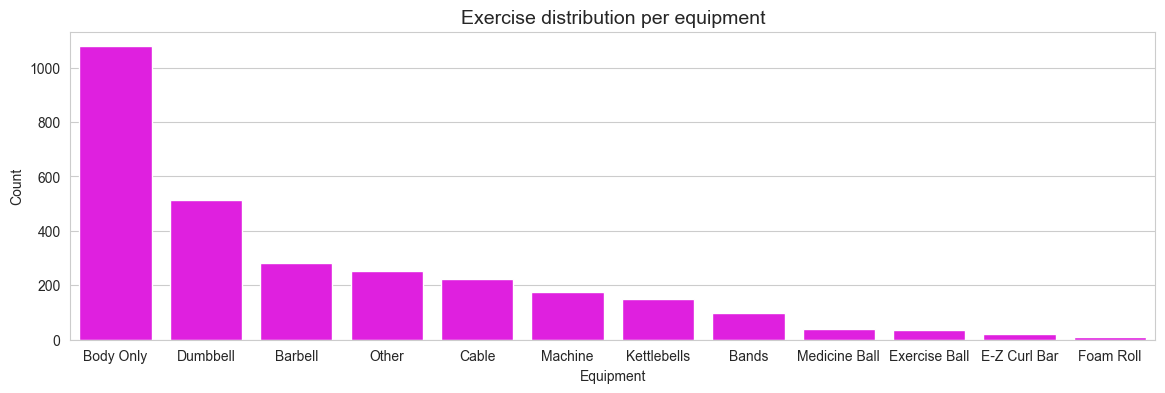

In [29]:
amount_exercises_equipment_graph = plt.figure(figsize=(14, 4))
ax = sns.barplot(data = amount_exercises_equipment, x = "Equipment", y = "Exercise Name", color = "magenta")
plt.xlabel("Equipment")
plt.ylabel("Count")
plt.title("Exercise distribution per equipment", size = 14)

**Bivariate exploration**

- **Muscle Group vs Difficulty Level**

From the muscle distribution per difficulty level is concluded that:
* Beginner exercises target: quads, chest, hamstrings, shoulders and biceps the most.
* Intermediate exercises target: abs, quads, shoulders, chest and biceps the most.
* Expert exerciases only target quads, lats and abs.

Quadriceps, lats and abdominals are targeted by all levels of difficulty.

In [30]:
muscle_difficulty = gym_exercises_df.groupby(["Muscle Group", "Difficulty Level"]).size().unstack(fill_value = 0.0)
muscle_difficulty

Difficulty Level,Beginner,Expert,Intermediate
Muscle Group,,,
Abdominals,29.0,1.0,627.0
Abductors,3.0,0.0,18.0
Adductors,5.0,0.0,10.0
Biceps,37.0,0.0,131.0
Calves,13.0,0.0,31.0
Chest,67.0,0.0,193.0
Forearms,17.0,0.0,13.0
Glutes,13.0,0.0,68.0
Hamstrings,53.0,0.0,62.0


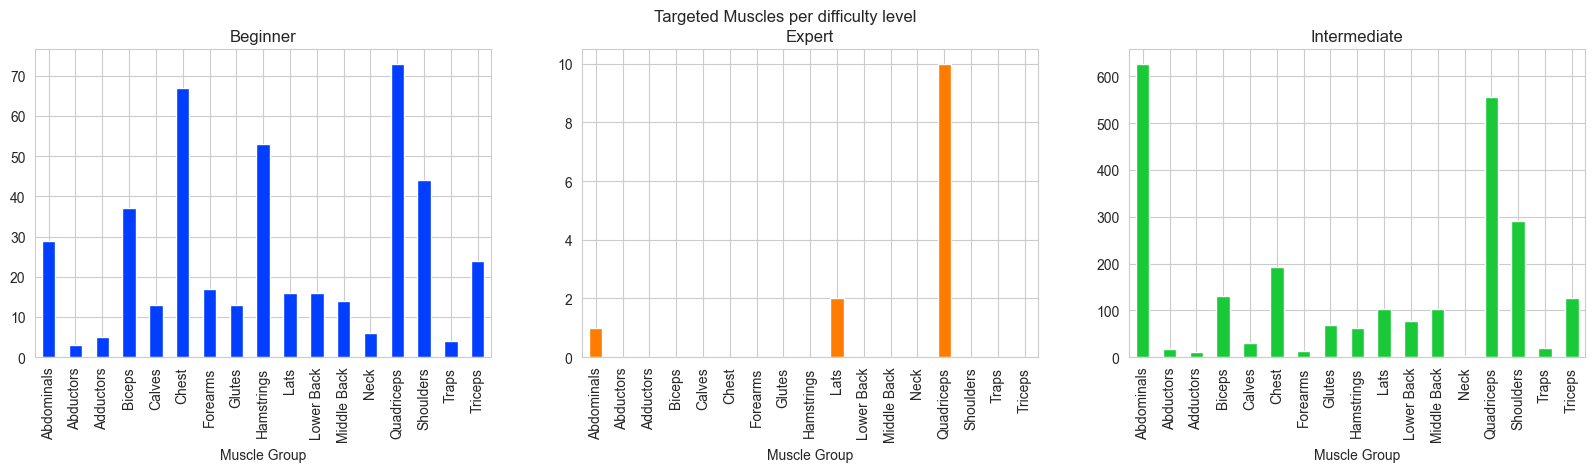

In [31]:
sns.set_palette("bright")
muscle_difficulty_graph = muscle_difficulty.plot(subplots = True, 
                                                 layout = (1, 3), 
                                                 kind = "bar", 
                                                 figsize = (20, 4), 
                                                 legend= False, 
                                                 title = "Targeted Muscles per difficulty level")

- **Equipment vs Muscle Group**

There are 17 different types of muscle groups.

In [32]:
muscles = gym_exercises_df["Muscle Group"].nunique()
muscles

17

The equipment that targets the most muscle groups are body only and bands, while the ez-curl bar is the least efficient equipment, as it only targets 4 different muscle groups.

In [33]:
# Gives the amount of unique values of muscles for each equipment type
equipment_efficiency = gym_exercises_df.groupby("Equipment")["Muscle Group"].nunique().sort_values(ascending = False)
equipment_efficiency

Equipment
Bands            16
Body Only        16
Machine          15
Other            15
Dumbbell         14
Barbell          14
Cable            13
Kettlebells      12
Foam Roll        10
Medicine Ball     8
Exercise Ball     7
E-Z Curl Bar      4
Name: Muscle Group, dtype: int64

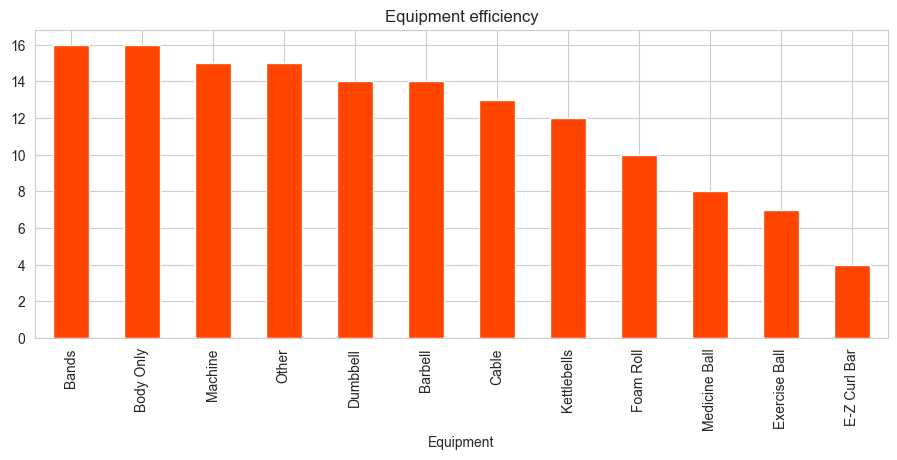

In [34]:
equipment_efficency_graph = equipment_efficiency.plot(kind = "bar", title = "Equipment efficiency", color = "orangered", figsize = (11, 4))

There are 12 different types of equipment in the data set.

In [35]:
equipment = gym_exercises_df["Equipment"].nunique()
equipment

12

The shoulders are the part of the body that uses the most equipment, while the neck uses the least.

In [36]:
equipment_muscle_use = gym_exercises_df.groupby("Muscle Group")["Equipment"].nunique().sort_values(ascending = False)
equipment_muscle_use

Muscle Group
Shoulders      12
Quadriceps     11
Glutes         11
Chest          11
Abdominals     10
Lower Back     10
Lats           10
Hamstrings     10
Triceps        10
Biceps          9
Middle Back     9
Forearms        7
Calves          7
Traps           6
Adductors       5
Abductors       4
Neck            2
Name: Equipment, dtype: int64

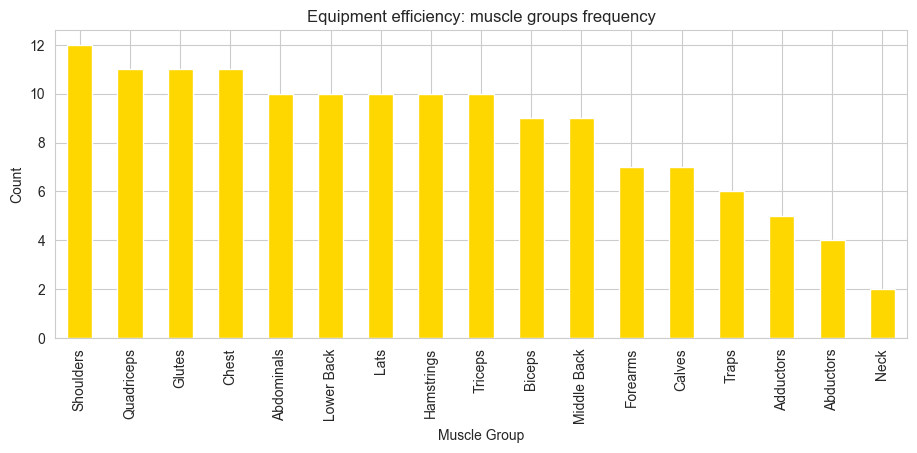

In [37]:
equipment_muscle_use_graph = equipment_muscle_use.plot(kind = "bar", 
                                                       ylabel = "Count", 
                                                       title = "Equipment efficiency: muscle groups frequency", 
                                                       color = "gold", 
                                                       figsize = (11, 4))

In [38]:
muscle_equipment = gym_exercises_df.groupby(["Muscle Group", "Equipment"]).size().unstack(fill_value = 0.0)
muscle_equipment

Equipment,Bands,Barbell,Body Only,Cable,Dumbbell,E-Z Curl Bar,Exercise Ball,Foam Roll,Kettlebells,Machine,Medicine Ball,Other
Muscle Group,,,,,,,,,,,,
Abdominals,8.0,12.0,434.0,30.0,49.0,0.0,21.0,0.0,19.0,5.0,18.0,61.0
Abductors,2.0,0.0,17.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Adductors,1.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
Biceps,4.0,26.0,6.0,30.0,79.0,10.0,0.0,1.0,0.0,6.0,0.0,6.0
Calves,3.0,4.0,8.0,0.0,4.0,0.0,0.0,1.0,0.0,18.0,0.0,6.0
Chest,12.0,25.0,88.0,25.0,50.0,2.0,3.0,0.0,6.0,25.0,7.0,17.0
Forearms,2.0,5.0,1.0,3.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0
Glutes,5.0,5.0,54.0,4.0,4.0,0.0,2.0,1.0,3.0,1.0,1.0,1.0
Hamstrings,2.0,25.0,35.0,2.0,6.0,0.0,2.0,1.0,12.0,19.0,0.0,11.0


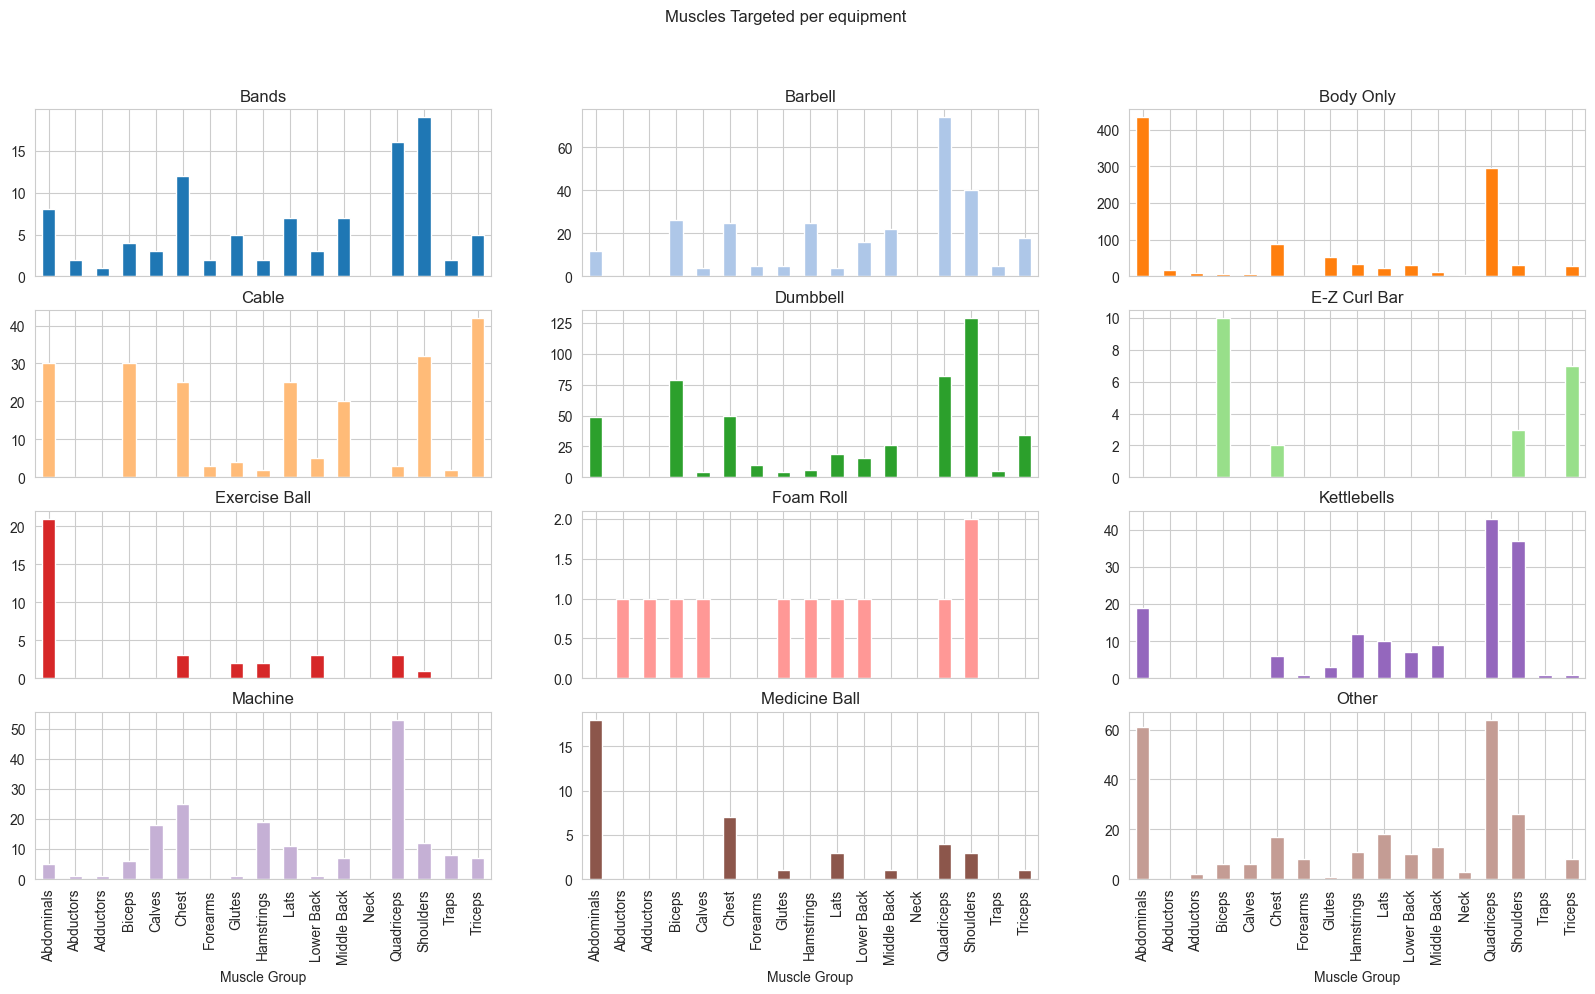

In [39]:
sns.set_palette("tab20")
muscle_equipment_graph = muscle_equipment.plot(subplots = True, 
                                                 layout = (4, 3), 
                                                 kind = "bar", 
                                                 figsize = (20, 10), 
                                                 legend= False, 
                                                 title = "Muscles Targeted per equipment")

- **Muscle Group vs Exercise Type**

From the muscle distribution per exercise type is clear that:

* Cardio: targets mostly quads and barely targets forarms and arms.
* Olimpic weightlifting focuses on: legs (quads and hamstrings), glutes, shoulders and triceps.
* Plyometrics targets: legs (quads and hamstrings), chest, abas, shoulders, adductors and lats.
* Powerlifting focuses on: legs, triceps, lower back, and chest.
* Strength is well distributed with focus on quads and abs.
* Stretching distribution is uniform.
* Strongman: quads, shoulers, lower back, hams, forarms and chest

In [40]:
muscle_exercise_type = gym_exercises_df.groupby(["Muscle Group", "Exercise Type"]).size().unstack(fill_value = 0.0)
muscle_exercise_type

Exercise Type,Cardio,Olympic Weightlifting,Plyometrics,Powerlifting,Strength,Stretching,Strongman
Muscle Group,,,,,,,
Abdominals,2.0,0.0,6.0,0.0,639.0,10.0,0.0
Abductors,0.0,0.0,0.0,0.0,12.0,9.0,0.0
Adductors,0.0,0.0,4.0,0.0,6.0,5.0,0.0
Biceps,0.0,0.0,0.0,0.0,165.0,3.0,0.0
Calves,1.0,0.0,0.0,0.0,33.0,10.0,0.0
Chest,1.0,0.0,15.0,3.0,237.0,3.0,1.0
Forearms,0.0,0.0,0.0,0.0,27.0,1.0,2.0
Glutes,0.0,1.0,0.0,4.0,67.0,9.0,0.0
Hamstrings,1.0,11.0,9.0,9.0,64.0,20.0,1.0


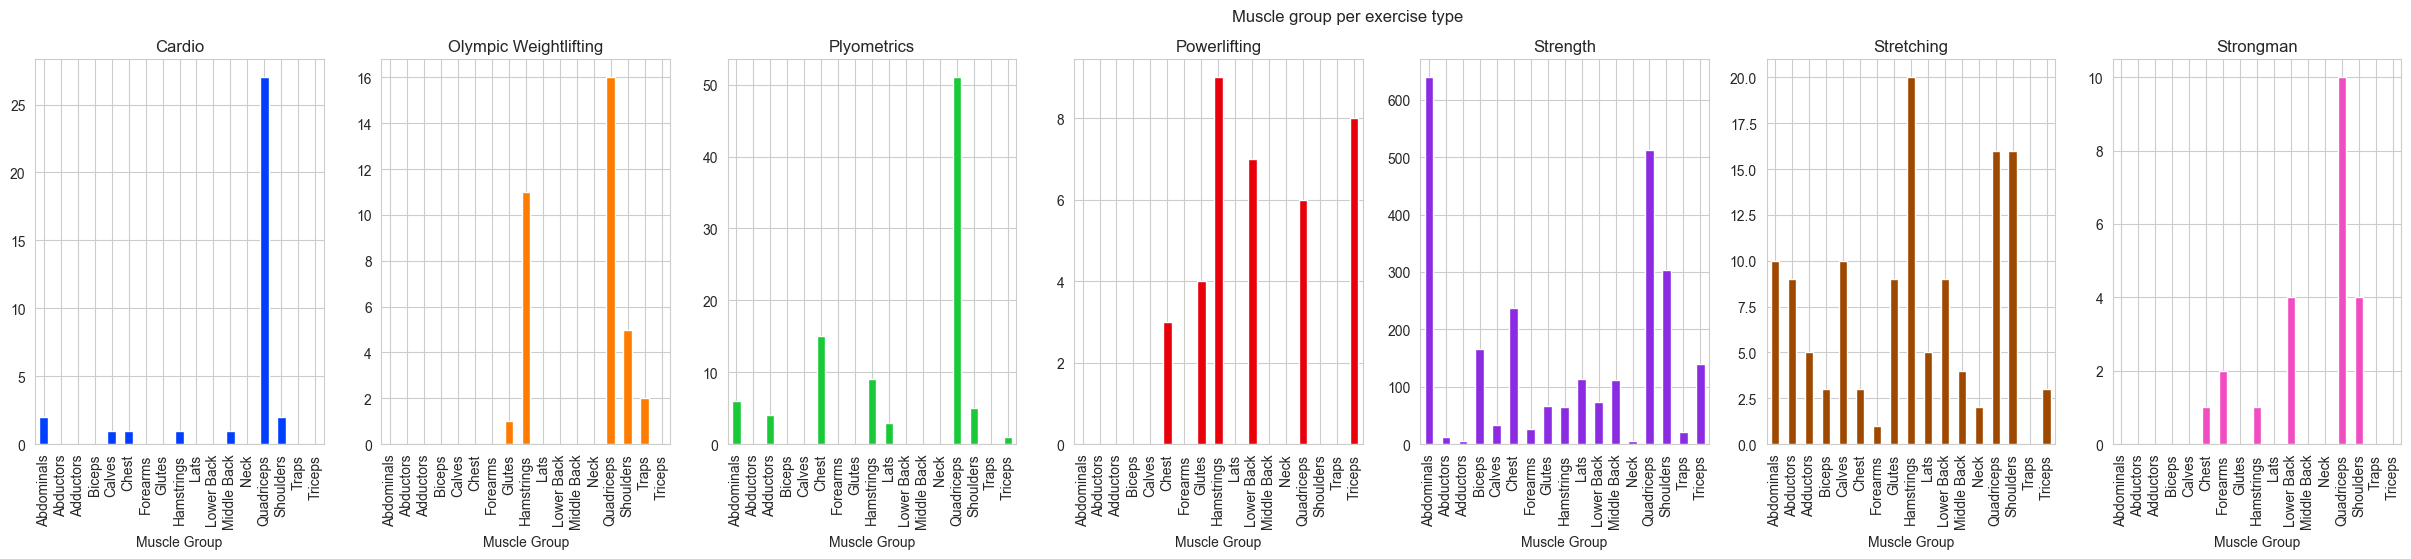

In [41]:
sns.set_palette("bright")
muscle_exercise_type_graph =  muscle_exercise_type.plot(subplots = True, 
                                                               layout = (1, 8), 
                                                               kind = "bar", 
                                                               figsize = (35, 5), 
                                                               legend= False,
                                                               title = "Muscle group per exercise type")

- **Exercise Type**

There are 7 different types of exercises: strenght, plyometrics, cardio, stretching, powerlifting, strongman, and olympic weighlifting.

In [42]:
exercise_types = gym_exercises_df["Exercise Type"].unique()
exercise_types

array(['Strength', 'Plyometrics', 'Cardio', 'Stretching', 'Powerlifting',
       'Strongman', 'Olympic Weightlifting'], dtype=object)

- **Equipment vs Exercise Type**

The most used equipment per exercise type is:

* Cardio: body only
* Olympic Weightlifting: barbell
* Plyometrics: body only
* Powerlifting: barbell
* Strength: body only
* Stretching: body only
* Strongman: other -- special equipment for strongman exercises

Therefore, the most used equipment for each type of exercise is body only followed y barbell.

In [43]:
equipment_exercise_type = gym_exercises_df.groupby(["Equipment", "Exercise Type"]).size().unstack(fill_value = 0.0)
equipment_exercise_type

Exercise Type,Cardio,Olympic Weightlifting,Plyometrics,Powerlifting,Strength,Stretching,Strongman
Equipment,,,,,,,
Bands,0.0,0.0,0.0,4.0,91.0,3.0,0.0
Barbell,0.0,35.0,0.0,29.0,216.0,0.0,1.0
Body Only,20.0,0.0,54.0,0.0,906.0,98.0,0.0
Cable,0.0,0.0,0.0,0.0,223.0,0.0,0.0
Dumbbell,0.0,0.0,4.0,1.0,508.0,0.0,0.0
E-Z Curl Bar,0.0,0.0,0.0,0.0,22.0,0.0,0.0
Exercise Ball,0.0,0.0,1.0,0.0,33.0,1.0,0.0
Foam Roll,0.0,0.0,0.0,0.0,2.0,9.0,0.0
Kettlebells,0.0,0.0,1.0,0.0,148.0,0.0,0.0


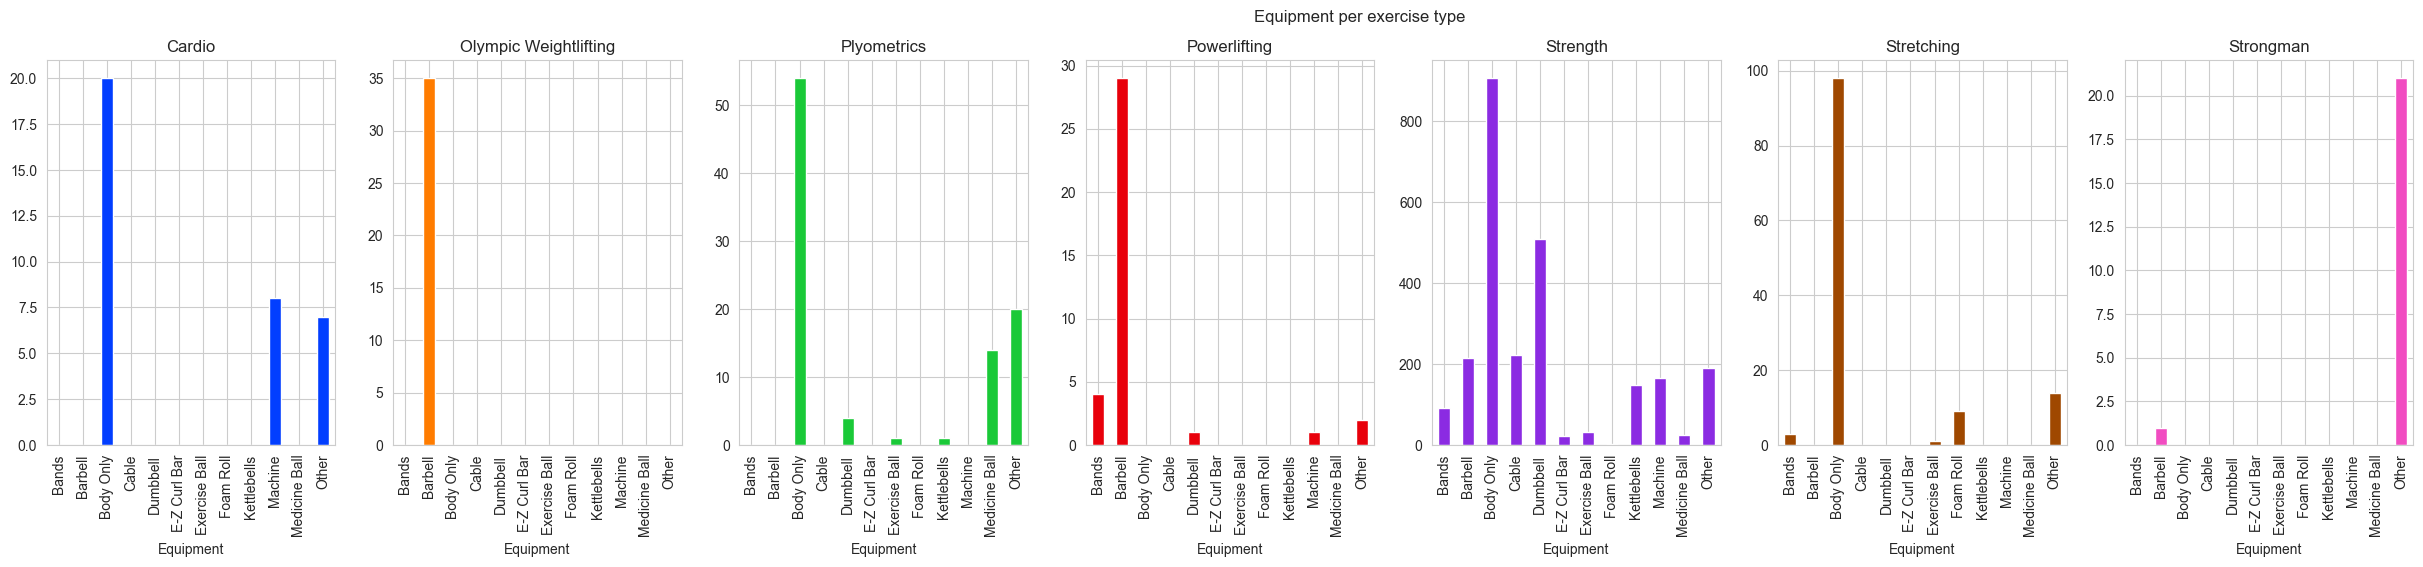

In [44]:
equipment_exercise_type_graph = equipment_exercise_type.plot(subplots = True, 
                                                               layout = (1, 8), 
                                                               kind = "bar", 
                                                               figsize = (35, 5), 
                                                               legend= False,
                                                               title = "Equipment per exercise type")

- **Exercise Type vs Difficulty Level**

In all the 3 different levels of difficulty strength is the most used type of exercise.

In [45]:
exercise_type_per_level = gym_exercises_df.groupby(["Exercise Type", "Difficulty Level"]).size().unstack(fill_value = 0.0)
exercise_type_per_level

Difficulty Level,Beginner,Expert,Intermediate
Exercise Type,,,
Cardio,9.0,0.0,26.0
Olympic Weightlifting,30.0,1.0,4.0
Plyometrics,33.0,2.0,59.0
Powerlifting,27.0,0.0,10.0
Strength,277.0,10.0,2242.0
Stretching,42.0,0.0,83.0
Strongman,16.0,0.0,6.0


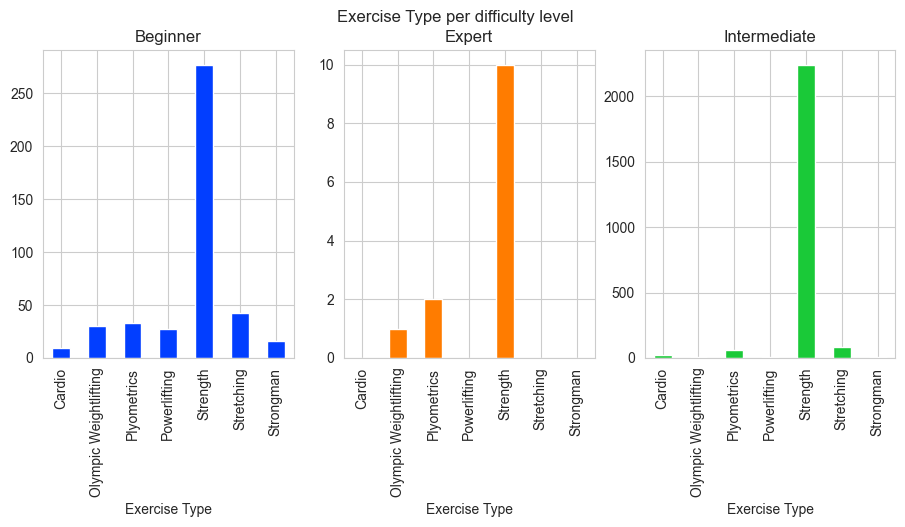

In [46]:
exercise_type_per_level_graph = exercise_type_per_level.plot(subplots = True, 
                                                             layout = (1, 3), 
                                                             kind = "bar", 
                                                             figsize = (11, 4), 
                                                             legend= False, 
                                                             title = "Exercise Type per difficulty level")

- **Difficulty vs Equipment**

The most used equipment equipment are body only and barbell.
* Beginner: barbell
* Intermediate: body only
* Expert: barbell

In [47]:
equipment_difficulty = gym_exercises_df.groupby(["Equipment", "Difficulty Level"]).size().unstack(fill_value = 0.0)
equipment_difficulty

Difficulty Level,Beginner,Expert,Intermediate
Equipment,,,
Bands,20.0,0.0,78.0
Barbell,99.0,5.0,177.0
Body Only,82.0,3.0,993.0
Cable,26.0,0.0,197.0
Dumbbell,51.0,1.0,461.0
E-Z Curl Bar,4.0,0.0,18.0
Exercise Ball,6.0,0.0,29.0
Foam Roll,4.0,0.0,7.0
Kettlebells,32.0,1.0,116.0


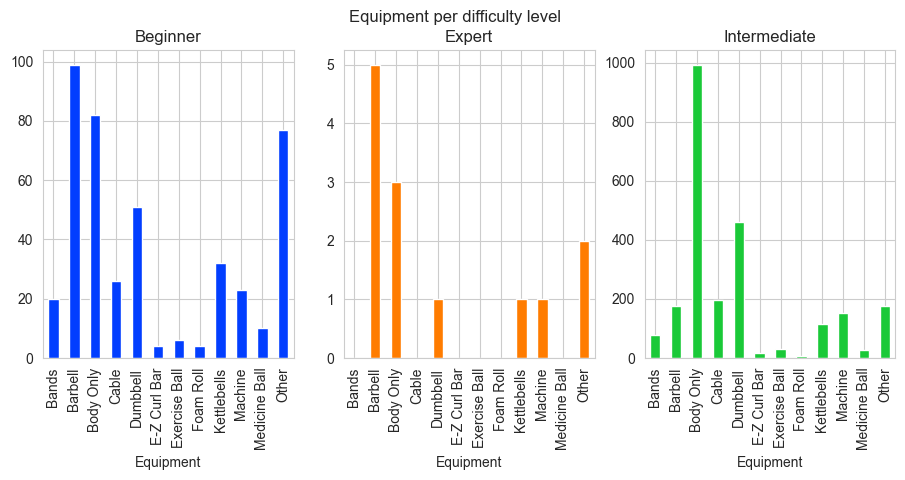

In [48]:
equipment_difficulty_graph = equipment_difficulty.plot(subplots = True, 
                                                       layout = (1, 3), 
                                                       kind = "bar", 
                                                       figsize = (11, 4), 
                                                       legend= False, 
                                                       title = "Equipment per difficulty level")

### Insights

- **Most Frequently Trained Muscle Groups**: Abdominals, quadriceps, and shoulders.
- **Exercise Availability by Skill Level**: Intermediate users have access to the widest range of exercises, followed by beginners.
- **Most Popular Exercise Types**: Strength and stretching exercises are the most commonly performed.
- **Most Commonly Used Equipment**: Bodyweight (no equipment), dumbbells, and barbells are the top choices.

- **Most Efficient Equipment**: Resistance bands and bodyweight exercises are considered the most efficient.
- **Most Equipment-Dependent Muscle Group**: The shoulders require the greatest variety of equipment.

**Breakdown by User Level:**

1. **Beginners**
- Primarily perform strength exercises.
- Focus on training the quadriceps, chest, and hamstrings.
- Most frequently use bodyweight and barbells.

2. **Intermediate Users**
- Primarily engage in strength training.
- Focus on the abdominals, quadriceps, and shoulders.
- Most commonly use bodyweight and dumbbells.

3. **Experts**
- Strong emphasis on strength training.
- Target primarily the quadriceps, abdominals, and lats.
- Typically use bodyweight and barbells.

**Most Trained Muscle Group and Equipment by Exercise Type:**

| Exercise Type          | Primary Muscle Group | Common Equipment   |
|------------------------|----------------------|--------------------|
| **Cardio**             | Quadriceps           | Bodyweight         |
| **Olympic Weightlifting** | Quadriceps        | Barbell            |
| **Plyometrics**        | Quadriceps           | Bodyweight         |
| **Powerlifting**       | Hamstrings           | Barbell            |
| **Strength**           | Abdominals           | Bodyweight         |
| **Stretching**         | Hamstrings           | Bodyweight         |
| **Strongman**          | Quadriceps           | Other Equipment    |

#### **Best rated exercises by Muscle Group**

In [49]:
# Filter exercises with rating above 9
best_rated_exercises = gym_exercises_df[gym_exercises_df["Rating"] >= 9].sort_values(by = "Rating", ascending = False)

# Define Muscle Groups
muscle_list = ["Abdominals", "Abductors", "Adductors", "Biceps", "Calves", "Chest", "Forarms", "Glutes", "Hamstring", "Lats", "Lower Back", "Middle Back", "Neck", "Quadriceps", "Shoulders", "Traps", "Triceps"]

# Initialize empty dictionary to store top exercises per muscle
Top_rated_exercises_per_muscle = {}

for muscle in muscle_list:
    # Find all the best rated exercises for the muscle
    best_exercise_per_muscle = best_rated_exercises[best_rated_exercises["Muscle Group"] == muscle]
    # Select the top rated exercise for the muscle
    if not best_exercise_per_muscle.empty:
        Top_rated_exercises_per_muscle[muscle] = best_exercise_per_muscle.iloc[0]["Exercise Name"]

# Convert dictionary to data frame
Top_rated_exercises_per_muscle_df = pd.DataFrame.from_dict(Top_rated_exercises_per_muscle, orient = "index", columns= ["Exercise Name"])
Top_rated_exercises_per_muscle_df.reset_index(inplace = True)
Top_rated_exercises_per_muscle_df.rename(columns = {"index" : "Muscle Group"})

,Muscle Group,Exercise Name
0,Abdominals,Landmine twist
1,Adductors,Thigh adductor
2,Biceps,Incline Hammer Curls
3,Calves,Smith Machine Calf Raise
4,Chest,Pushups
5,Glutes,Barbell glute bridge
6,Lats,Weighted pull-up
7,Lower Back,Atlas Stones
8,Middle Back,T-Bar Row with Handle
9,Neck,Lying Face Down Plate Neck Resistance


#### **Full body strength beginner routine with barbell equipment**

In [50]:
# Define muscle groups
muscle_list

# Filter exercises by strength type
strength_exercises = gym_exercises_df[gym_exercises_df["Exercise Type"] == "Strength"]

# Filter exercises by body only equipment
strength_exercises = strength_exercises[strength_exercises["Equipment"] == "Barbell"]

# Filter exercises by beginner level of difficulty
strength_exercises_beginner = strength_exercises[strength_exercises["Difficulty Level"] == "Beginner"]

# Initialize empty dictionaries to store the exercises
beginner_fullbody_strength_barbell_routine = {}

for muscle in muscle_list:
    # Find all best rated strength exercises with body only equipment for a beginner
    beginner_routine = strength_exercises_beginner[strength_exercises_beginner["Muscle Group"] == muscle]
    if not beginner_routine.empty:
        beginner_fullbody_strength_barbell_routine[muscle] = beginner_routine.iloc[0]["Exercise Name"]

beginner_fullbody_strength_barbell_routine_df = pd.DataFrame.from_dict(beginner_fullbody_strength_barbell_routine, orient = "index", columns= ["Exercise Name"])
beginner_fullbody_strength_barbell_routine_df.reset_index(inplace = True)
beginner_fullbody_strength_barbell_routine_df.rename(columns = {"index" : "Muscle Group"})


,Muscle Group,Exercise Name
0,Abdominals,Bench barbell roll-out
1,Biceps,Wide-grip barbell curl
2,Calves,Rocking Standing Calf Raise
3,Chest,Wide-grip bench press
4,Lats,Barbell pull-over to press
5,Lower Back,Stiff Leg Barbell Good Morning
6,Middle Back,Yates Row Reverse Grip
7,Quadriceps,Weighted Jump Squat
8,Shoulders,Snatch-Grip Behind-The-Neck Overhead Press
9,Triceps,Decline Close-Grip Bench To Skull Crusher


#### **Full body stretch routine with no equipment**

In [51]:
# Define muscle groups
muscle_list

# Filter exercises by stretch type
stretch_exercises = gym_exercises_df[gym_exercises_df["Exercise Type"] == "Stretching"]

# Filter exercises by body only equipment
stretch_exercises = stretch_exercises[stretch_exercises["Equipment"] == "Body Only"]

# Initialize empty dictionaries to store the exercises
fullbody_stretch_bodyweight_routine = {}

for muscle in muscle_list:
    # Find all best rated strength exercises with body only equipment for a beginner
    stretching_routine = stretch_exercises[stretch_exercises["Muscle Group"] == muscle]
    if not stretching_routine.empty:
        fullbody_stretch_bodyweight_routine[muscle] = stretching_routine.iloc[0]["Exercise Name"]

fullbody_stretch_bodyweight_routine_df = pd.DataFrame.from_dict(fullbody_stretch_bodyweight_routine, orient = "index", columns= ["Exercise Name"])
fullbody_stretch_bodyweight_routine_df.reset_index(inplace = True)
fullbody_stretch_bodyweight_routine_df.rename(columns = {"index" : "Muscle Group"})

,Muscle Group,Exercise Name
0,Abdominals,Stomach Vacuum
1,Abductors,Standing Hip Circles
2,Adductors,Groiners
3,Biceps,Seated Biceps
4,Calves,Peroneals-SMR
5,Glutes,Lying glute stretch
6,Lats,One Arm Against Wall
7,Lower Back,Superman
8,Middle Back,Rhomboids SMR
9,Neck,Side Neck Stretch


#### **Top 5 exercises: abdominals, quadriceps and shoulders**

In [52]:
# Filter exercises by rating above 9
best_rated_exercises

# Filter exercises by abdominals
best_abs_exercises = best_rated_exercises[best_rated_exercises["Muscle Group"] == "Abdominals"]
best_abs_exercises = best_abs_exercises[0:5][["Muscle Group", "Exercise Name", "Equipment"]].reset_index(drop = True)
best_abs_exercises

,Muscle Group,Exercise Name,Equipment
0,Abdominals,Landmine twist,Other
1,Abdominals,Dumbbell V-Sit Cross Jab,Dumbbell
2,Abdominals,Dumbbell spell caster,Dumbbell
3,Abdominals,Suspended ab fall-out,Other
4,Abdominals,Bottoms Up,Body Only


In [53]:
# Filter exercises by quadriceps
best_quads_exercises = best_rated_exercises[best_rated_exercises["Muscle Group"] == "Quadriceps"]
best_quads_exercises = best_quads_exercises[0:5][["Muscle Group", "Exercise Name", "Equipment"]].reset_index(drop = True)
best_quads_exercises

,Muscle Group,Exercise Name,Equipment
0,Quadriceps,Single-Leg Press,Machine
1,Quadriceps,Clean from Blocks,Barbell
2,Quadriceps,Tire flip,Other
3,Quadriceps,Barbell Full Squat,Barbell
4,Quadriceps,Push-press,Barbell


In [54]:
# Filter exercises by shoulders
best_shoulders_exercises = best_rated_exercises[best_rated_exercises["Muscle Group"] == "Shoulders"]
best_shoulders_exercises = best_shoulders_exercises[0:5][["Muscle Group", "Exercise Name", "Equipment"]].reset_index(drop = True)
best_shoulders_exercises

,Muscle Group,Exercise Name,Equipment
0,Shoulders,Dumbbell front raise to lateral raise,Dumbbell
1,Shoulders,Single-arm palm-in dumbbell shoulder press,Dumbbell
2,Shoulders,Clean and press,Barbell
3,Shoulders,Clean and jerk,Barbell
4,Shoulders,Single-arm kettlebell push-press,Kettlebells
